In [4]:
!pip install graphrole


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from graphrole import RecursiveFeatureExtractor, RoleExtractor
import networkx as nx

In [6]:
G = nx.read_edgelist("Ips.csv", delimiter=",")

#Features are then extracted from a graph G into a pandas.DataFrame:
feature_extractor = RecursiveFeatureExtractor(G)
features = feature_extractor.extract_features()

#these features are used to learn roles. The number of roles is automatically 
#determined by a model selection procedure when n_roles=None is passed to the
#RoleExtractor class instance. Alternatively, n_roles can be set to a desired 
#number of roles to be extracted.
role_extractor = RoleExtractor(n_roles=None)
role_extractor.extract_role_factors(features)

#The role assignment for each node can be retrieved as a dictionary
print("ROLE ASSIGMENT")
print(role_extractor.roles)
print("\n\n")

#Alternatively, roles can be viewed as a soft assignment and a node's percent
#membership to each role can be retrieved as a pandas.DataFrame
print("PROBABILITYS FOR EACH NODE")
print(role_extractor.role_percentage)
print("\n\n")


ROLE ASSIGMENT
{'10.11.12.13': 'role_0', '10.120.1.191': 'role_0', '10.130.0.157': 'role_0', '10.130.1.139': 'role_0', '10.130.10.101': 'role_0', '10.130.10.158': 'role_0', '10.130.10.176': 'role_0', '10.130.10.191': 'role_0', '10.130.10.215': 'role_0', '10.130.10.232': 'role_0', '10.130.11.248': 'role_0', '10.130.12.1': 'role_0', '10.130.12.118': 'role_0', '10.130.12.23': 'role_0', '10.130.12.6': 'role_0', '10.130.13.177': 'role_0', '10.130.13.188': 'role_0', '10.130.13.79': 'role_0', '10.130.15.113': 'role_0', '10.130.15.197': 'role_0', '10.130.2.149': 'role_0', '10.130.2.75': 'role_0', '10.130.2.9': 'role_0', '10.130.3.216': 'role_0', '10.130.3.73': 'role_0', '10.130.4.39': 'role_0', '10.130.4.78': 'role_0', '10.130.5.199': 'role_0', '10.130.5.215': 'role_0', '10.130.5.245': 'role_0', '10.130.5.32': 'role_0', '10.130.5.95': 'role_0', '10.130.6.112': 'role_0', '10.130.6.91': 'role_0', '10.130.7.123': 'role_0', '10.130.8.133': 'role_0', '10.130.8.174': 'role_0', '10.130.8.20': 'role_0

In [11]:

def printGraph(G, pos, roles):
    # positions for all nodes
    # nodes
    for n in G.nodes():
        if roles[n] == "role_0":
            color = "red"
        elif roles[n] == "role_1":
            color = "blue"
        elif roles[n] == "role_2":
            color = "green"
        elif roles[n] == "role_3":
            color = "pink"
        elif roles[n] == "role_4":
            color = "orange"
        elif roles[n] == "role_5":
            color = "yellow"
        elif roles[n] == "role_6":
            color = "grey"
        elif roles[n] == "role_7":
            color = "brown"
        nx.draw_networkx_nodes(G, pos, nodelist=[n], node_size=36, node_color=color)
    # edges
    nx.draw_networkx_edges(G, pos, width=0.5,alpha=0.2)
    # labels
    #labels = nx.get_edge_attributes(G, 'weight')
    #nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.axis('off')
    plt.show()



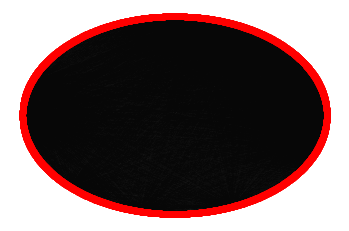

In [12]:
import matplotlib.pyplot as plt
k_cores = nx.k_core(G)
pos = nx.shell_layout(k_cores)
printGraph(k_cores, pos, role_extractor.roles)


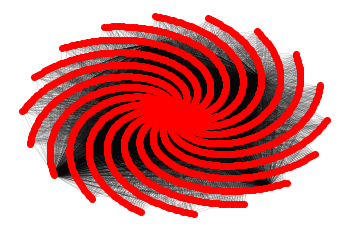

In [13]:
k_cores = nx.k_core(G)
pos = nx.spiral_layout(k_cores)
printGraph(k_cores, pos, role_extractor.roles)